<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt X</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

<p>**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)</p>

<p>**Abgabe**: Montag, 27.06, 2016 vor der Vorlesung</p>

<p>**Name**: <font color="red">Bitte geben Sie ihren Namen an</font></p>

<p>**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font></p><br />


<table style="border-style: none; width: 100%; margin-top: 20px; padding: 0px;"
><tr style="border-style: none; margin: 0px; padding: 0px;">
<td style="border-style: none; width: 80%; margin: 0px; padding: 0px; font-size: 20px; font-weight: bold">Ordnung muss sein</td>
<td style="border-style: none; width: 20%; margin: 0px; padding: 0px; text-align: right">(5 Punkte)</td></tr></table>



In dieser Aufgabe wollen wir die **Effizienz von Algorithmen** untersuchen. Dazu wollen wir verschiedene Algorithmen betrachten, eine Menge  natürlicher Zahlen der Größe nach zu sortieren.

Als Eingabe werden wir Listen von zufällig erzeugten natürlichen Zahlen zwischen 1 und 100 verwenden:
```
numbers = rand(1:100, 50)
```
Kommentieren Sie den folgenden Ausschnitt Zeile für Zeile:

In [1]:
function sort_1!(v)
    # this function sorts all elements in the array v
    
    n_elements = length(v) # save the length of the array
    # save number of steps here
    # one step is defined by one comparison of two values
    n_steps = 0 # zero steps are done yet

    for i = 1:n_elements - 1 
        # sort all elements with index >= i
        # for each index from 1 to d of array v do:
        
        min = i # set actual (i-th) value to be the minimum
        for j = i + 1:n_elements # for all FOLLOWING elements (j>i) do:
            n_steps += 1 # one "step" is done, so increase the number of taken steps by 1
            if (v[j] < v[min])
                # if the value on position j is smaller than the value on position min: set minimum to index j
                min = j
            end
        end
        
        # swap the element at index i with the element at index min
        # if min is at position i, nothing will be done
        # else the smallest value of the array v2=v[i:end] will be saved at the i-th position
        # and the former value from positon i will be put to the former position of the smallest element
        v[i], v[min] = v[min], v[i]
        # now all elements up to element i are sorted
    end 

    # return the number of taken steps
    return n_steps
end 

len = 50 # sort an array with 50 random elements
numbers = rand(1:100, len) # each element is an integer from 1 to 100
println(sort_1!(numbers)) # print the number of taken steps
#println(numbers) # print the sorted array

1225


Der Code hat einen Zähler, der bestimmt, **wie viele Iterationsschritte** (Schleifendurchläufe) bis zur vollständigen Sortierung benötigt wurden.
 
Ermitteln Sie die nötigen Iterationsschritte für Listen verschiedener Längen. Bestimmen Sie (auch mit Hilfe des Programmcodes) eine Formel, die die Anzahl der Durchläufe in Abhängigkeit von der Länge $n$ der eingegebenen Liste abschätzt. Reduzieren Sie den erhaltenen Term auf seine **führende Ordnung**. Sehen Sie, wie Sie diese führende Ordnung auf den ersten Blick aus dem Programmcode ableiten können?

**Antwort:** Um einen $n$-elementigen Array zu sortieren werden genau $\frac{n\cdot(n-1)}{2}$ Schritte benötigt. Man kann dies aus dem Code ablesen, da die erste Schleife $(n-1)$-mal durchlaufen wird. Die zweite Schleife wird beim ersten Aufruf $(n-2)$-mal ausgeführt, beim zweiten Aufruf $(n-3)-$mal usw. Somit kommt man auf die Summe $\sum_{i=1}^{N-1} i$, was ebenso der obigen Formel entspricht.

Die benötigte Laufzeit in Abhängigkeit der Länge der Eingabe nennt man die **Komplexität** eines
Algorithmus. Jeder Algorithmus lässt sich in eine sogenannte Komplexitätsklasse einordnen, die mit z.B. $\mathcal{O} (n^4)$ notiert wird (auch $\mathcal{O}$-Notation genannt). 

**Antwort:** Aus der oben angegebenen Formel für die Anzahl der Schritte wird klar, dass die Komplexität $\mathcal{O}(n^2)$ betragen sollte.

Ermitteln Sie nun die Laufzeit als Funktion der Eingabelänge und stellen Sie diese Beziehung grafisch dar. Können Sie die zuvor ermittelte Komplexitätsklasse bestätigen?

In [2]:
using PyPlot

function plot_sort(sort::Function, xs::Array)
    # calculate steps
    ys = []
    
    for n in xs
        push!(ys, sort(rand(1:100, n)))
    end
    
    # plot
    figure()
    title("Number of steps to sort the Array")
    xlabel(L"Length $N$ of Array")
    ylabel(L"number $n(N)$ of steps")
    plot(xs, ys, label=L"n(N)", marker="o")
    legend()
    return
end

plot_sort (generic function with 1 method)

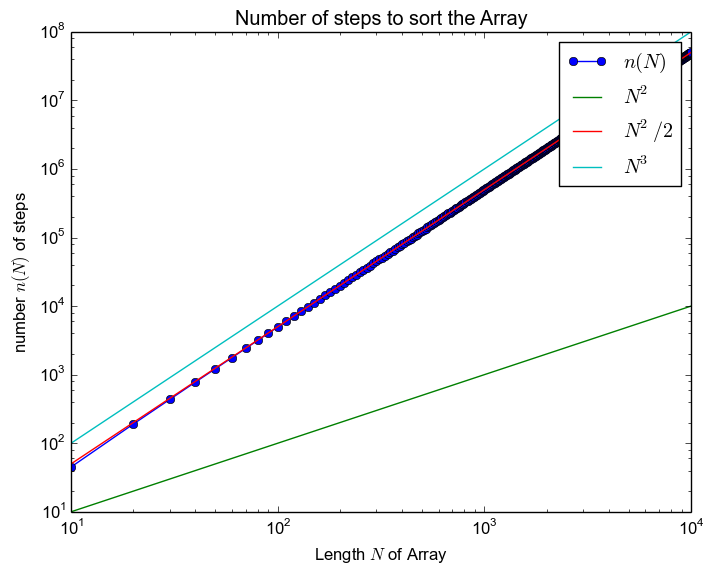

PyObject <matplotlib.legend.Legend object at 0x88fa4fec>

In [3]:
xs = collect(0:10:10000)
plot_sort(sort_1!, xs)
loglog(xs, xs, label=L"N^2")
loglog(xs, xs.*xs/2, label=L"N^2/2")
loglog(xs, xs.*xs, label=L"N^3")
legend()

**Beobachtung:** Da beide Graphen nahezu deckungsgleich sind, scheint die theoretische Ordnung des Algorhytmus *sort_1* zu stimmen.

Betrachten Sie nun den untenstehenden Sortieralgorithmus und versuchen Sie nachzuvollziehen, wie dieser Algorithmus funktioniert. Überlegen Sie sich, warum er auch unter dem Namen **merge sort** bekannt ist.

In [4]:
function sort_2!(v)
    # first split the array in two parts
    # sort both parts recursively
    # join the parts into v so that it is fully sorted
    if length(v) > 1
        # split array into two parts with the same size
        middle = Int(floor(length(v) / 2))
        left = copy(v[1:middle])
        right = copy(v[middle + 1:end])

        sort_2!(left)  # sort left part  (recursively)
        sort_2!(right) # sort right part (recursively)

        i, j, k = 1, 1, 1 # initialize indices
        # i is the index for the left part
        # j is the index for the right part
        # k is the index for v
    
        while i <= length(left) && j <= length(right)
            # compare the elements from the left and the right part
            # put the smaller element into array v
            #   and increase the index of the corresponding partial array
            if left[i] < right[j]
                v[k] = left[i]
                i += 1
            else
                v[k] = right[j]
                j += 1
            end
            # now increase the index of the full array v
            k += 1
        end

        while i <= length(left)
            # now append the rest of the left part to the array v
            v[k] = left[i]
            i += 1
            k += 1
        end
        
        while j <= length(right)
            # now append the rest of the right part to the array v
            v[k] = right[j]
            j += 1
            k += 1
        end
    end
end

len = 50
numbers = collect(rand(1:100, len))
sort_2!(numbers)
#println(numbers)

Stellen Sie nun auch für diesen Algorithmus die Geschwindigkeit grafisch dar. Auf Kosten wovon wurde bei diesem Algorithmus der **Geschwindigkeitsvorteil** erkauft? (Tipp: Auf welche Kennzahl achten Sie üblicherweise beim Laptop-/Computerkauf neben der Prozessorgeschwindigkeit?).  

* Die Ordnung liegt bei $N$, genauer bei $N\cdot\log(N)$.
* Die Geschwindigkeit wurde auf Kosten eines höheren Speicherbedars gewonnen.